In [ ]:
import init_notebook
from test_module import test_function

test_function()


 Mean squared error is: 
 0.018635040587481


Text(0, 0.5, 'coordinate 2')

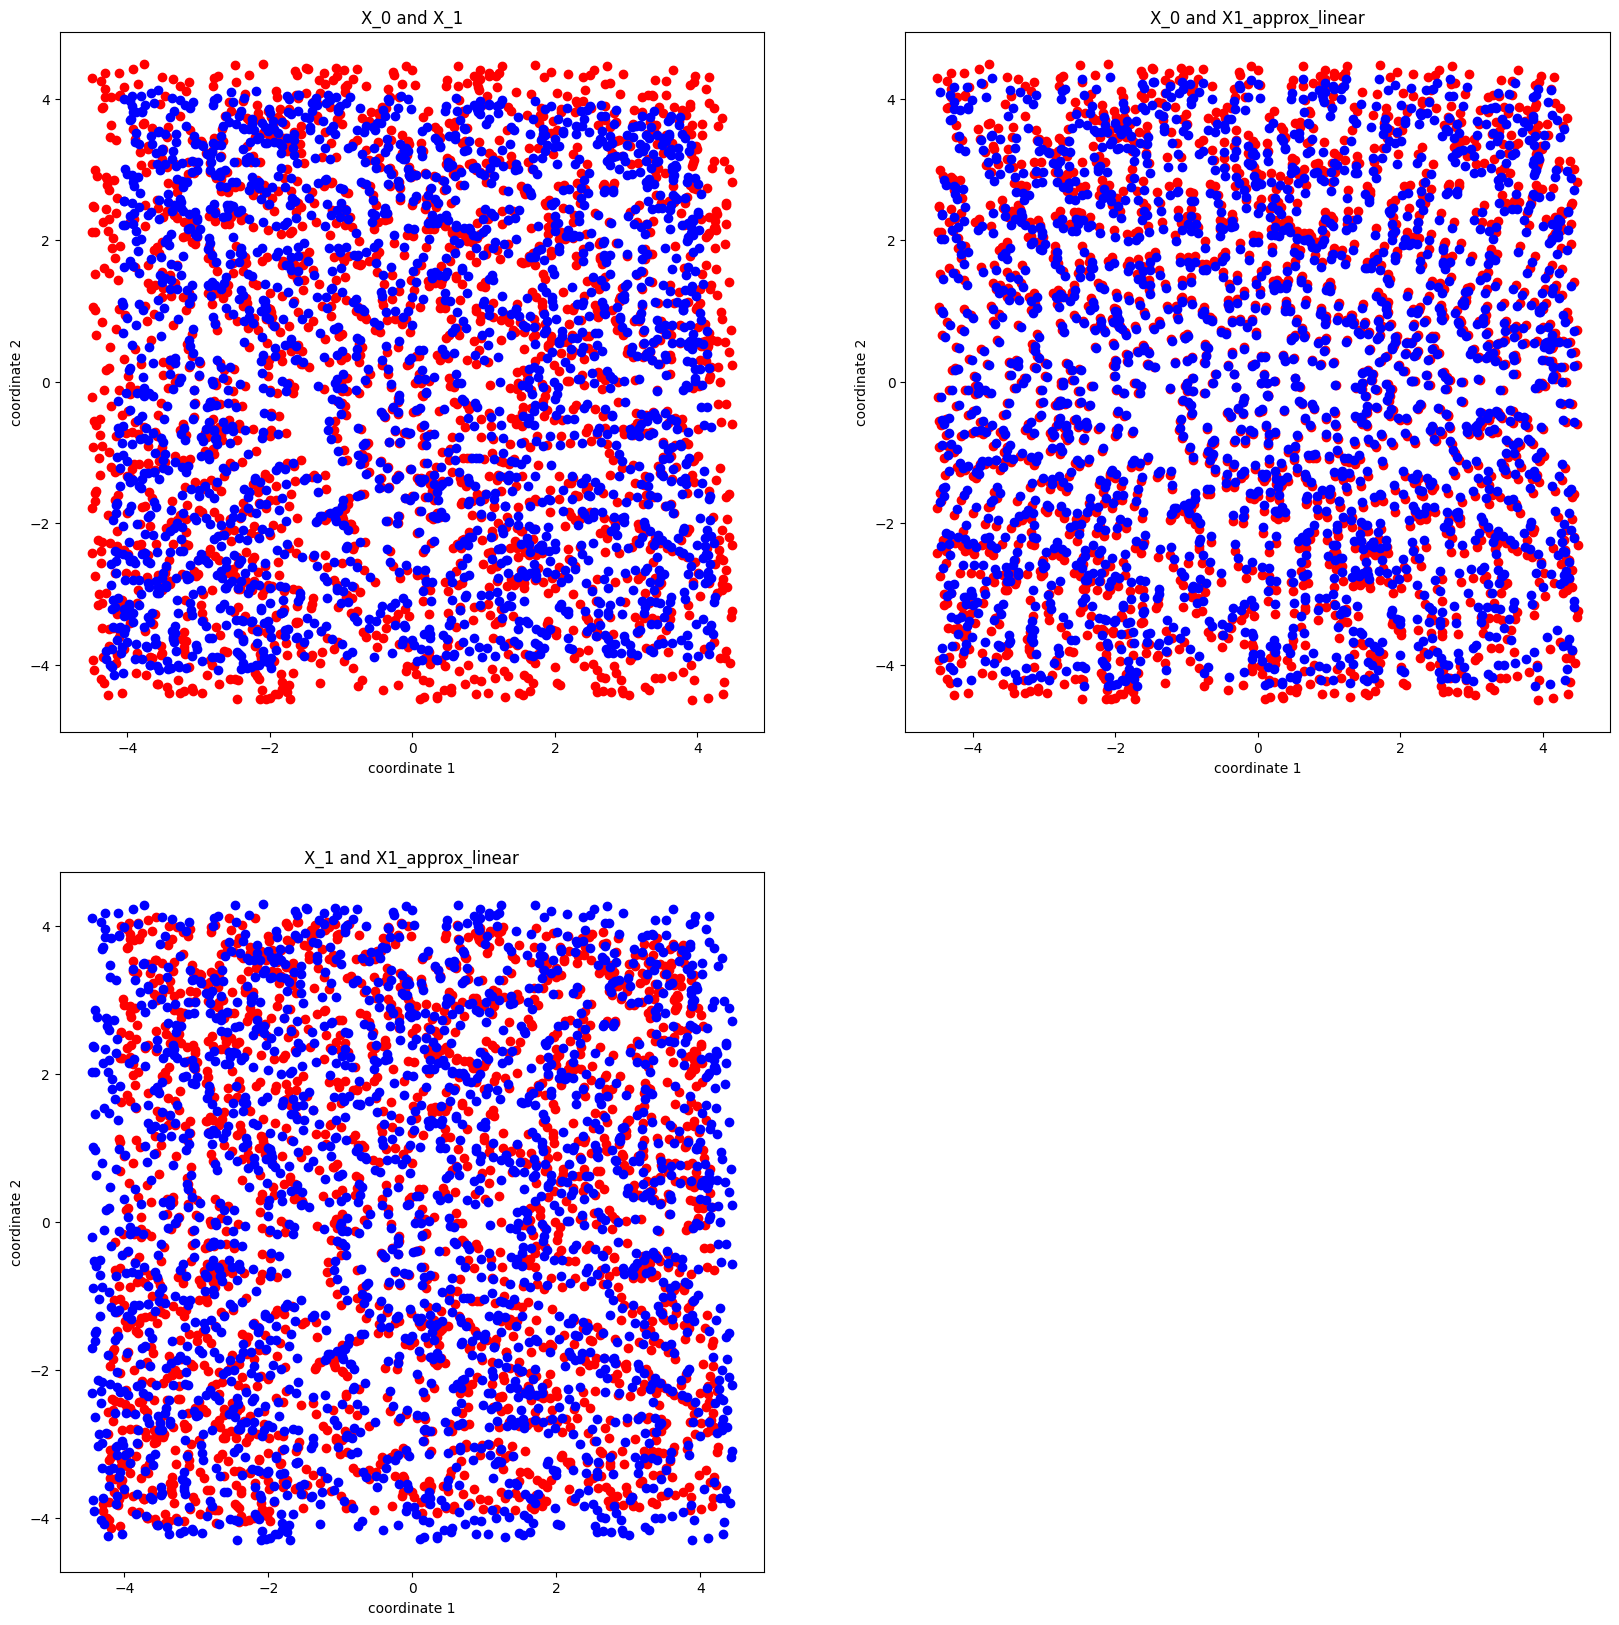

In [40]:
# Part 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



X_0 = np.loadtxt("task_3/nonlinear_vectorfield_data_x0.txt", dtype=float)
X_1 = np.loadtxt("task_3/nonlinear_vectorfield_data_x1.txt", dtype=float)


dt = 0.01


V_x = (X_1 - X_0)/dt

A_hat_transpose = np.linalg.lstsq(X_0, V_x, rcond = None)[0] 



# Calculating X_1_hat from X_0 by solving an IVP

def solve_ivp_predict(X_0, C_hat_transpose):
    ivp_function = np.dot(X_0, A_hat_transpose)
    X1_hat = np.zeros_like(X_0)
    for i in range(X_0.shape[0]):
        result = solve_ivp(lambda t, x: ivp_function[i], [0, 0.01], X_0[i], method='RK45', t_eval=[0.01])
        X1_hat[i, :] = result.y[:, -1]
    return X1_hat

# Predict X1_hat for the entire X0 dataset using solve_ivp
X1_approx_linear = solve_ivp_predict(X_0, A_hat_transpose)



# Computing mean square error between X_1_approx and X_1

mean_squared_error = np.square(np.subtract(X1_approx_linear, X_1)).mean()
print("\n Mean squared error is: \n", mean_squared_error)


plt.rcParams["figure.figsize"] = (20,20) 

plt.subplot(2,2,1)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X_1[:,0], X_1[:,1], color = 'blue')
plt.title('X_0 and X_1')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

plt.subplot(2,2,2)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X1_approx_linear[:,0], X1_approx_linear[:,1], color = 'blue')
plt.title('X_0 and X1_approx_linear')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

plt.subplot(2,2,3)
plt.scatter(X_1[:,0], X_1[:,1], color = 'red')
plt.scatter(X1_approx_linear[:,0], X1_approx_linear[:,1], color = 'blue')
plt.title('X_1 and X1_approx_linear')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')


 Mean squared error is: 
 1.168917504965488e-09


Text(0, 0.5, 'coordinate 2')

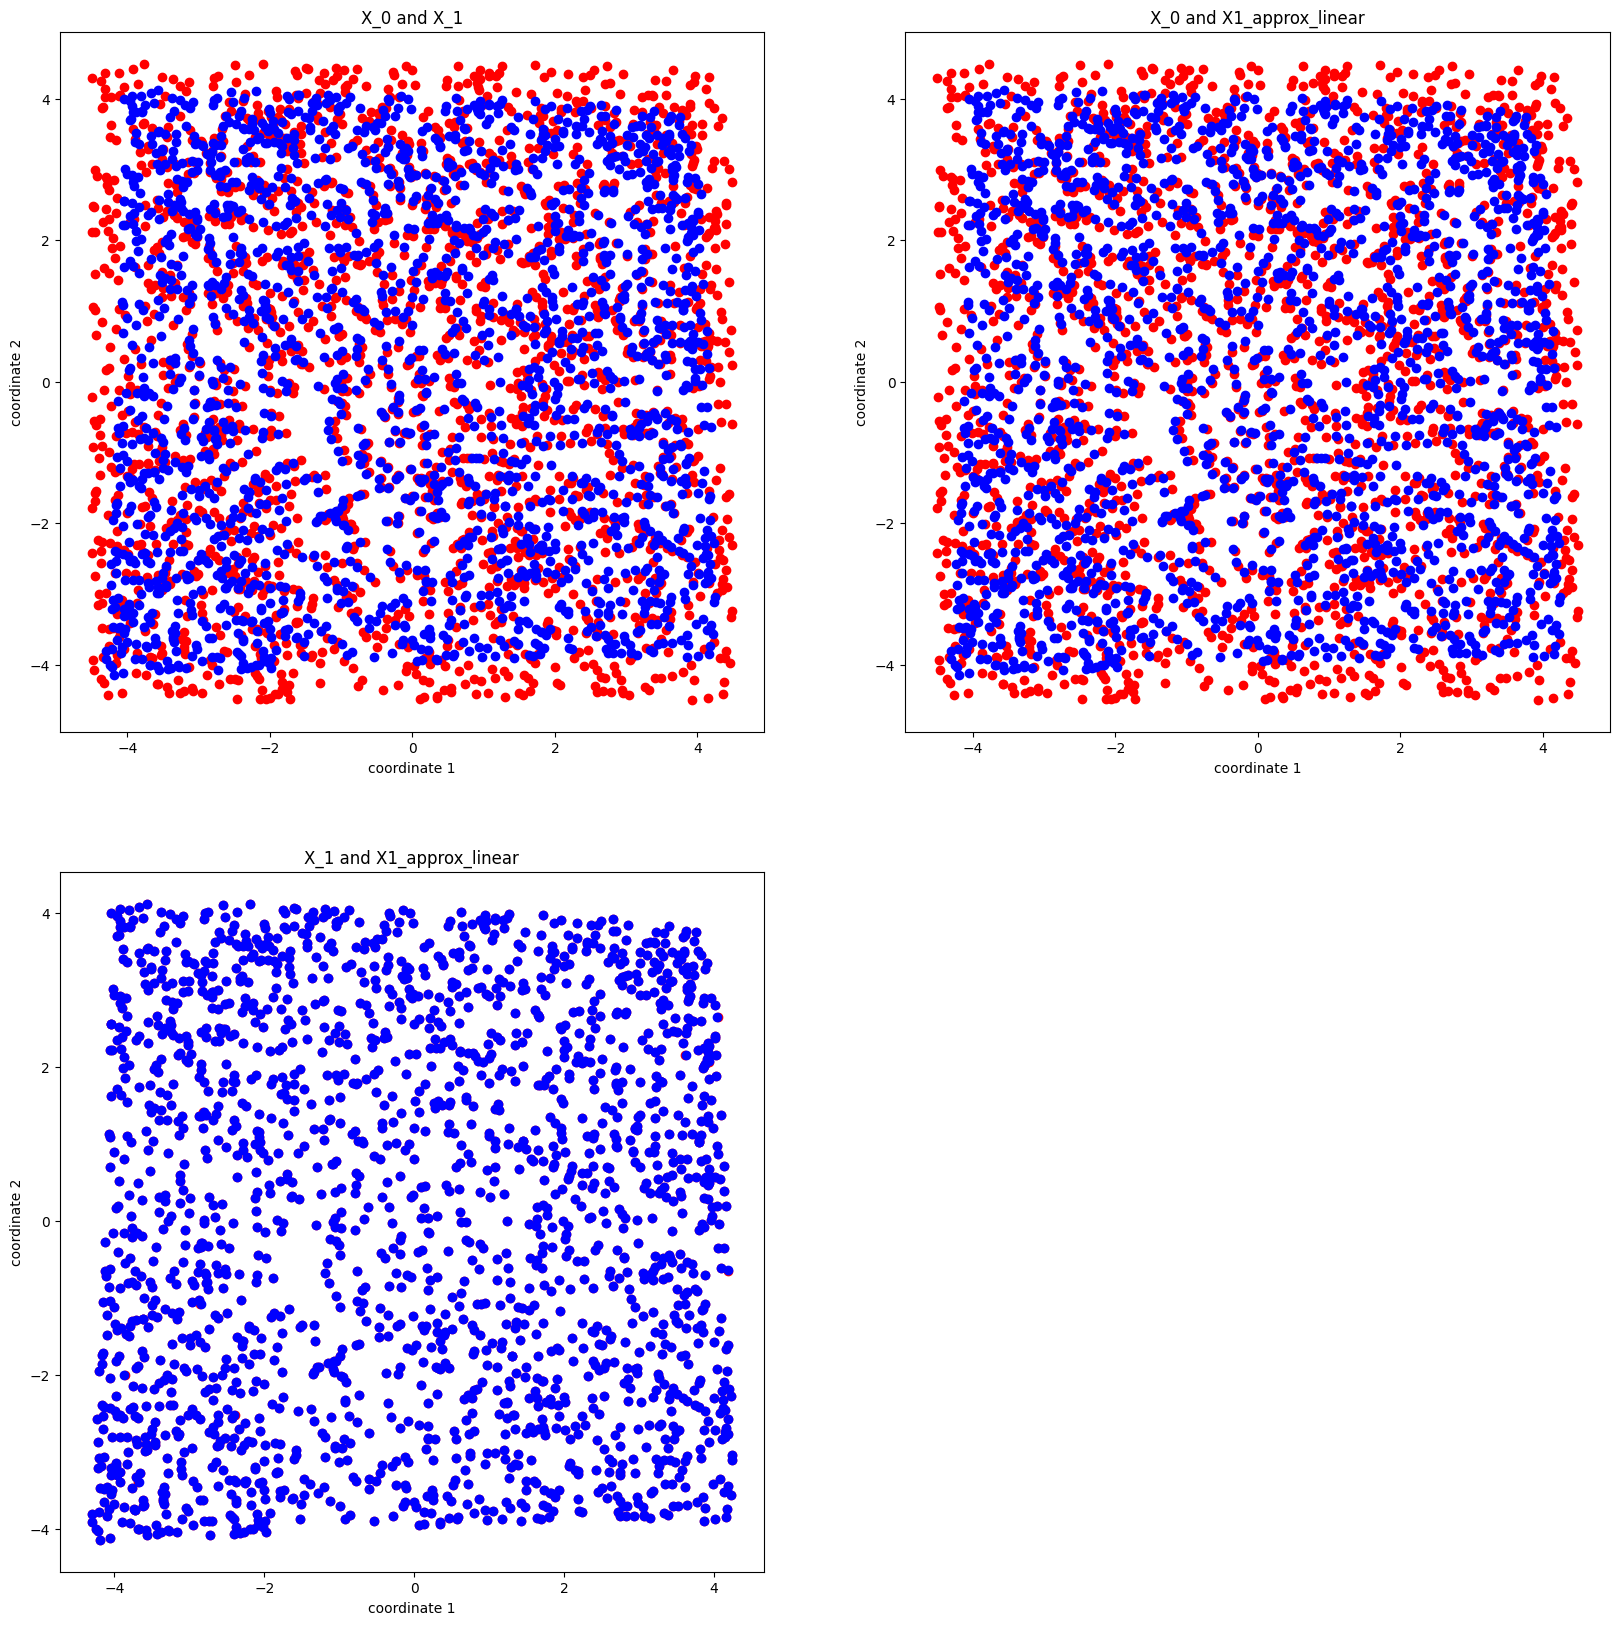

In [43]:
# Part 2

random_indices = np.random.choice(X_0.shape[0], 475, replace=False)

X_l = X_0[random_indices,:]

phi_X0_list = []
phi_X1_list = []
eps = 10
dt = 0.01

for i in range (len(X_0)):
    for j in range (len(X_l)):     
        phi_X0_list.append(np.exp(-pow(np.linalg.norm(X_l[j] - X_0[i]),2)/(eps**2)))

phi_X0_array = np.array(phi_X0_list)

phi_X0 = phi_X0_array.reshape(2000,475) #phi_X0 matrix - 2000*475


V_x = (X_1 - X_0)/dt #shape = 2000*2

C_hat_transpose = np.linalg.lstsq(phi_X0, V_x, rcond = None)[0] #Shape = 475*2



def solve_ivp_predict(X_0, phi_X0, C_hat_transpose):
    ivp_function = np.dot(phi_X0, C_hat_transpose)
    X1_hat = np.zeros_like(X_0)
    for i in range(X_0.shape[0]):
        result = solve_ivp(lambda t, x: ivp_function[i], [0, 0.01], X_0[i], method='RK45', t_eval=[0.01])
        X1_hat[i, :] = result.y[:, -1]
    return X1_hat

# Predict X1_hat for the entire X0 dataset using solve_ivp
X1_approx_nonlinear = solve_ivp_predict(X_0, phi_X0, C_hat_transpose)

# Computing mean square error between X_1_approx and X_1

mean_squared_error = np.square(np.subtract(X1_approx_nonlinear, X_1)).mean()
print("\n Mean squared error is: \n", mean_squared_error)


plt.rcParams["figure.figsize"] = (20,20) 

plt.subplot(2,2,1)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X_1[:,0], X_1[:,1], color = 'blue')
plt.title('X_0 and X_1')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

plt.subplot(2,2,2)
plt.scatter(X_0[:,0], X_0[:,1], color='red')
plt.scatter(X1_approx_nonlinear[:,0], X1_approx_nonlinear[:,1], color = 'blue')
plt.title('X_0 and X1_approx_linear')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')

plt.subplot(2,2,3)
plt.scatter(X_1[:,0], X_1[:,1], color = 'red')
plt.scatter(X1_approx_nonlinear[:,0], X1_approx_nonlinear[:,1], color = 'blue')
plt.title('X_1 and X1_approx_linear')
plt.xlabel('coordinate 1')
plt.ylabel('coordinate 2')


